## Machine Learning - Artificial Intelligence - Natural Language Processing

In [4]:
## lets import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.set_theme(style='darkgrid',palette='Set2')

In [6]:
%matplotlib inline
from nltk.corpus import stopwords

In [10]:
## importing csv data and loading it into a dataframe
df = pd.read_csv(r"C:\Users\gmraj\Documents\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection",sep='\t',names=['lbl','msg'])

In [12]:
## EDA, Wrangling

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lbl     5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df.describe()

,lbl,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
df.groupby('lbl').describe()

msg                                                               
     count unique                                                top freq
lbl                                                                      
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [26]:
df['len'] = df['msg'].apply(len)

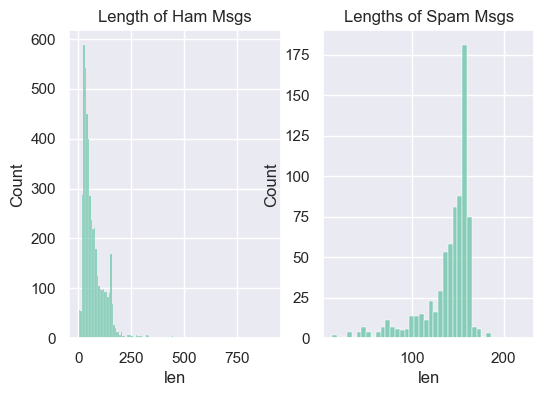

In [46]:
fig, axes = plt.subplots(1,2,figsize=(6,4))

axes[0].set_title('Length of Ham Msgs')
axes[1].set_title('Lengths of Spam Msgs')
sns.histplot(x='len',data=df[df['lbl']=='ham'],ax=axes[0])
sns.histplot(x='len',data=df[df['lbl']=='spam'],ax=axes[1])
plt.show()

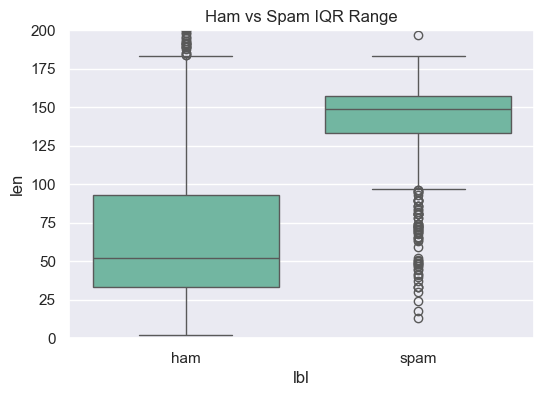

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x='lbl',y='len',data=df)
plt.title('Ham vs Spam IQR Range')
plt.ylim(0,200)
plt.show()

In [28]:
df.head(5)

,lbl,msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
## Lets create a function to clear the punctuations and stopwords so that we can create a meaningful bag of words

In [71]:
def text_process(msg):
    no_punc = [char for char in msg if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [73]:
df['msg'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: msg, dtype: object

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
bag_transformer = CountVectorizer(analyzer=text_process).fit(df['msg'])

In [83]:
print(len(bag_transformer.vocabulary_))

11425


In [87]:
## Converting the vectorizer into a sparse matrix for better storage and retrieval
msg_bag = bag_transformer.transform(df['msg'])

In [91]:
print('Share of sparse matrix: ',msg_bag.shape)
print('Number of Non Zero Occurances: ',msg_bag.nnz)

Share of sparse matrix:  (5572, 11425)
Number of Non Zero Occurances:  50548


Term Frequency (Tf) is the ratio of total words in a document vs number of times the selected word appears in a document. For example the word 'cat' appears 3 times in a document and there are a total of 100 words in that document. Then Tf will be calculcated as (3/1000) = 0.03

Inverse Document Frequency (Idf) is the logarithmic ratio of total number of documents in the corpus vs number of documents where the word 'cat' appears. For exampe there are 1 million documents in a corpus and there are 1000 such documents where the word 'cat' appears then Idf will be calculated as log(100000/1000) = 4

Hence, Tf-Idf can be calculated as Tf x Idf = 0.03 * 4 = 0.12

In [94]:
## Now lets use Naive Bayers algorithm to classify the ham/spam using Pipelines

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [112]:
msg_train, msg_test, lbl_train, lbl_test = train_test_split(df['msg'],df['lbl'],test_size=0.25)

In [114]:
print(len(msg_train),len(msg_test),len(lbl_train),len(lbl_test))

4179 1393 4179 1393


In [116]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [118]:
pipeline.fit(msg_train,lbl_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002A88AF2EB60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [120]:
predictions = pipeline.predict(msg_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix,check_scoring

In [124]:
print(classification_report(lbl_test,predictions))
print('\n')
print(confusion_matrix(lbl_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1214
        spam       1.00      0.70      0.82       179

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



[[1214    0]
 [  54  125]]


### Model performed the classification with an accuracy of 96% 

## Thank You